# Ejemplo Extra

Si te quedaste con ganas de ver un poco más de contenido sobre Sesgo y Varianza, te dejamos ésta notebook para puedas mirar y practicar.

Vamos a usar varias funciones nuevas de scikit-learn:
* [make_clasification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) (Genera aleatoriamente un problema de clasificacion)
* [validation_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html?highlight=validation_curve#sklearn.model_selection.validation_curve) (Determina las puntuaciones de entrenamiento y prueba para diferentes hiperparamentros)
* [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve#sklearn.model_selection.learning_curve) (Determina puntajes de pruebas y entrenamiento con validación cruzada para diferentes tamaños de conjuntos de entrenamiento)

Además, vamos a usar una nueva librería llamada `mlxtend` y en particular la función [bias_variance_decomp](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/).

***Para investigar:*** Para poder entender que estamos haciendo en los bloques de código que vienen a continuación, resulta fundamental que investigues un poco sobre las funciones de scikit-learn mencionadas, así como también sobre la nueva librería.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import random; random.seed(1982)

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [ ]:
X, y = make_classification(10000, 100, n_informative=3, n_classes=2, random_state=1982)

In [ ]:
X.shape

(10000, 100)

In [ ]:
y.shape

(10000,)

In [ ]:
x_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.35, train_size=0.65, random_state=1982)

In [ ]:
arbol = DecisionTreeClassifier(criterion='entropy')

In [ ]:
arbol.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Precisión entrenamiento: {0: .2f}".format(arbol.score(x_train, y_train)))

Precisión entrenamiento:  1.00


In [ ]:
print("Precisión evaluación: {0: .2f}".format(arbol.score(x_eval, y_eval)))

Precisión evaluación:  0.93


In [ ]:
arbol.tree_.max_depth

22

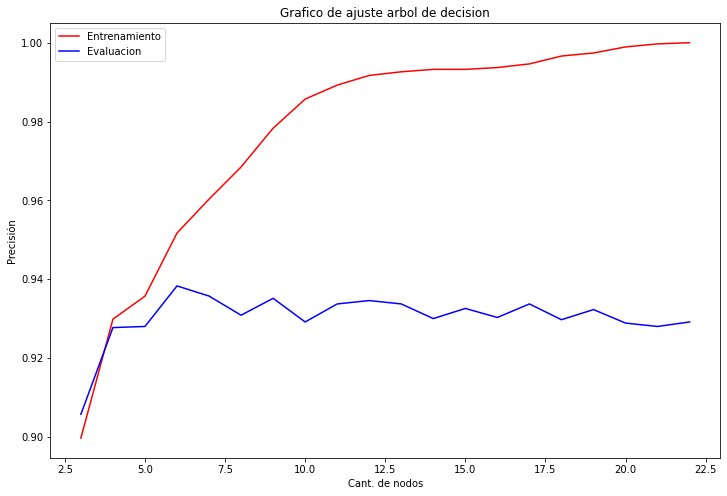

In [ ]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(x_train, y_train)
    train_prec.append(arbol3.score(x_train, y_train))
    eval_prec.append(arbol3.score(x_eval, y_eval))
    
plt.figure(figsize=(12,8))
plt.plot(max_deep_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Cant. de nodos')
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve

train_prec, eval_prec = validation_curve(estimator=arbol, X=x_train, y=y_train, param_name='max_depth', param_range=max_deep_list, cv=5)
#validacion cruzada: arbol de decision, define x, define y, parametro elegido, rango del paramentro, cantidad de folders
train_mean = np.mean(train_prec, axis=1) #media train
train_std = np.std(train_prec, axis=1) #desviacion estandar
test_mean = np.mean(eval_prec, axis=1) #media test
test_std = np.std(eval_prec, axis=1) #desviacion estandar

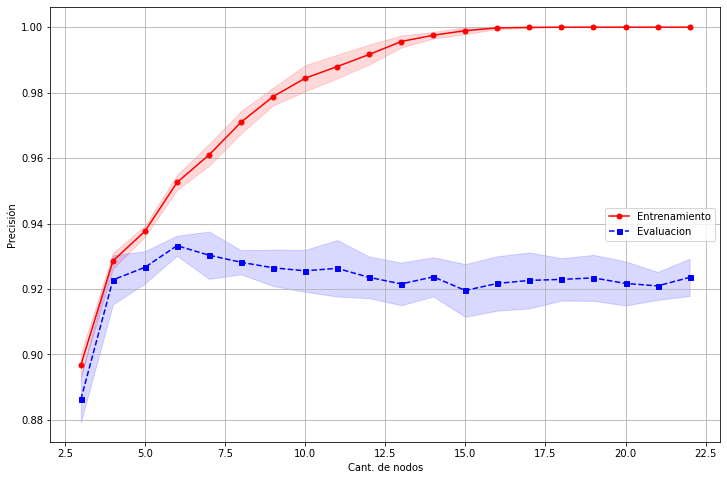

In [ ]:
# graficando las curvas
plt.figure(figsize=(12,8))
plt.plot(max_deep_list, train_mean, color='r', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(max_deep_list, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_deep_list, test_mean, color='b', linestyle='--', marker='s', markersize=5, label='Evaluacion')
plt.fill_between(max_deep_list, test_mean + test_std, test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Cant. de nodos')
plt.ylabel('Precisión')
plt.show()

In [ ]:
arbol2 = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
arbol2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("Precisión entrenamiento: {0: .2f}".format(arbol2.score(x_train, y_train)))

Precisión entrenamiento:  0.94


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=arbol2, X=x_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

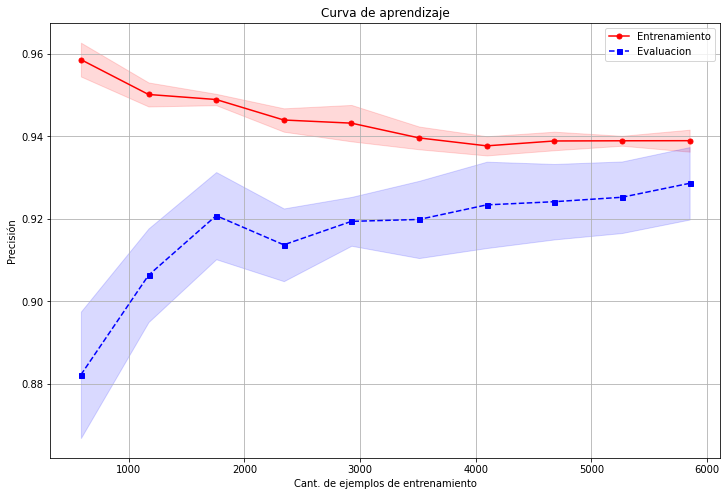

In [ ]:
# graficando las curvas
plt.figure(figsize=(12,8))
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', marker='s', markersize=5, label='Evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje')
plt.legend(loc='upper right')
plt.xlabel('Cant. de ejemplos de entrenamiento')
plt.ylabel('Precisión')
plt.show()

In [ ]:
!pip install mlxtend==0.17.2

     |████████████████████████████████| 1.3 MB 28.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.evaluate import bias_variance_decomp

### Aviso: el siguiente bloque de código puede demorarse varios minutos!

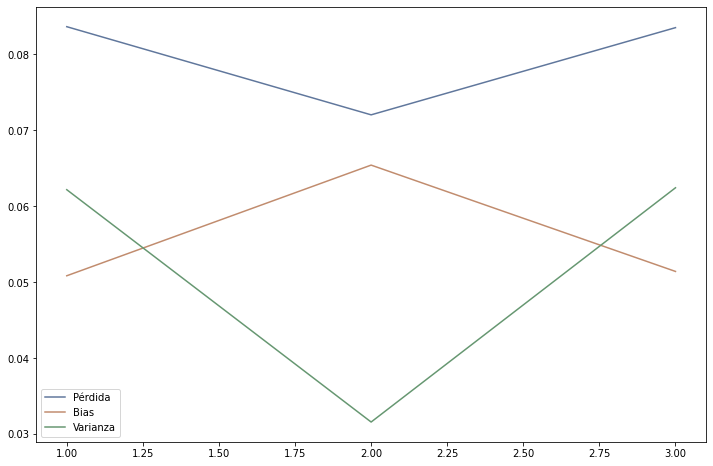

In [ ]:
loss = []
bias = []
variance = []
arboles = [arbol, arbol2, arbol3]
for x in range (0 , len(arboles)):
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(arboles[x], x_train, y_train, x_eval, y_eval, loss='0-1_loss', random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)
 
plt.figure(figsize=(12,8))
plt.plot(range(1, len(arboles) + 1), loss, label='Pérdida')
plt.plot(range(1,len(arboles) + 1), bias, label='Bias')
plt.plot(range(1, len(arboles) + 1), variance, label='Varianza')
plt.legend();